# Variáveis aleatórias
Variáveis aleatórias são valores que possuem uma distribuição de probabilidade, exemplo: gerar um número aleatório entre 1 e 5. Como temos cinco valores possíveis: 1, 2, 3, 4 e 5, cada um destes valores tem 20% de chance de serem gerados aleatoriamente. No Python e no Numpy temos classes que geram valores aleatórios:

In [2]:
import numpy as np
# gera cinco números entre [1 e 6), portanto valores 1, 2, 3, 4 e 5.
np.random.randint(1,6,5)

array([3, 2, 5, 4, 5])

# Distribuições contínuas
Normalmente o valor gerado aleatoriamente está entre (0 e 1), exemplo:

In [16]:
np.random.rand(2)

array([0.93413799, 0.97191626])

A função rand retorna x valores decimais entre (0 e 1). Neste caso todas os valores possíveis possuem a mesma probabilidade de serem gerados. Outro exemplo:

In [17]:
np.random.rand(5)

array([0.48438803, 0.2858286 , 0.60467126, 0.13552674, 0.99998441])

# Distribuição normal 
A distribuição normal (também chamada de gaussiana) é um valor aleatório gerado dentro de um intervalo de valores desejado, utiliza um valor de meio e um valor de desvio padrão, calculado pela equação:

![](http://www.sakurai.dev.br/images/posts/2019-06-23-revisao-estatistica-probabilidade-python-02.png)

No qual μ (mu) representa o valor da média e σ (sigma) representa um desvio padrão (portanto para mais ou para menos).

Gerando uma distribuição normal, em que a média é o valor 0 e o desvio padrão é 1, temos um gráfico:

![](http://www.sakurai.dev.br/images/posts/2019-06-23-revisao-estatistica-probabilidade-python-03.png)

No qual podemos perceber que +ou- 70% dos valores gerados de modo aleatório serão entre -1 e 1.

O Numpy possui implementação para a distribuição normal:

In [19]:
print(np.random.normal(0,1))
np.random.normal(0,1,5) # gera cinco números

0.9204728559082449


array([-0.58424722, -0.66098217,  0.68710595,  2.08798349,  0.62198131])

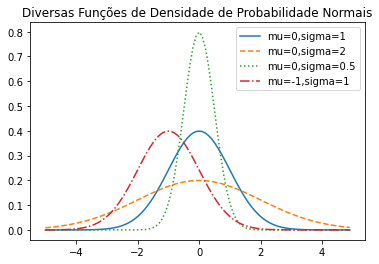

In [23]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Diversas Funções de Densidade de Probabilidade Normais")
plt.show()

É chamada de distribuição normal padrão quando μ = 0 e σ = 1. Se Z é uma
variável aleatória normal padrão, então:

X = σZ + μ

também é normal mas com a média μ e o desvio padrão σ. Por outro lado, se X é
uma variável aleatória normal com média μ e desvio padrão σ,

Z = (X - μ)/σ

é uma variável normal padrão.
A função de distribuição cumulativa para a distribuição normal não pode ser
escrita de maneira “elementar”, mas podemos escrever usando `math.erf`

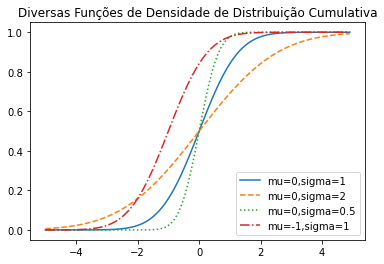

In [25]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Diversas Funções de Densidade de Distribuição Cumulativa")
plt.show()

# Teorema do limite central

O teorema estabelece que a distribuição da soma de variáveis aleatórias iid (independentes e identicamente distribuídas) tende para uma distribuição normal, independente da distribuição original das variáveis.

Para compreender melhor o significado do teorema, vamos a um exemplo:

Vamos considerar 100.000 doações feitas para um candidato, cujo valor mínimo de doação foi estabelecido em R$ 48.

O comportamento esperado é que a grande maioria faça a contribuição mínima.

Haverá, porém, contribuições acima do mínimo, em valores diversos e quantidades reduzidas.

Com isso, temos uma distribuição semelhante a uma log-normal ou exponencial, veja o gráfico.

In [43]:
# Vamos criar uma população distribuída de forma lognormal
import scipy.stats as stat
import random
random_state = 1
repeticoes = 100000
mean = 50

# População lognormal
s = 0.9
np.random.seed(1)
rv_lognorm = stat.lognorm(s=s,loc=mean)
populacao_lognorm = rv_lognorm.rvs(size=repeticoes, random_state=random_state)

escolhas = [0,1]
sexo_doadores = random.choices(population=escolhas, weights=[6/10,4/10], k=repeticoes)
sexo_doadores = np.asarray(sexo_doadores, dtype=np.int)

Mínimo 50.0203596851346
Máximo 92.5766469865867
Média 51.50502181456898
Desvio 1.6794273676283902
Var 2.8204762831392243


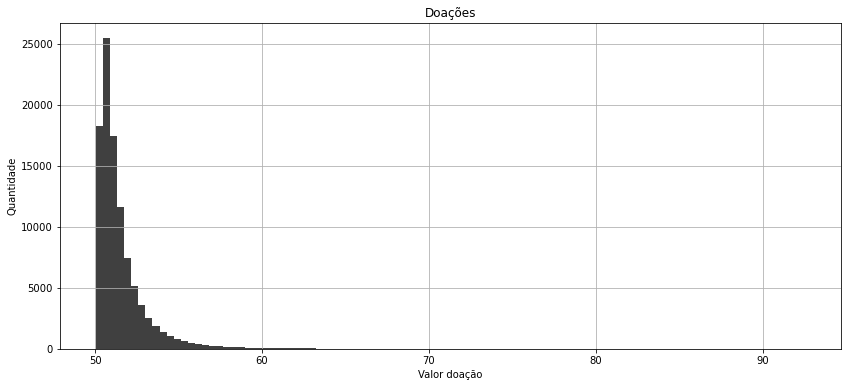

In [44]:
print('Mínimo {}'.format(np.min(populacao_lognorm)))
print('Máximo {}'.format(np.max(populacao_lognorm)))
print('Média {}'.format(np.mean(populacao_lognorm)))
print('Desvio {}'.format(np.std(populacao_lognorm)))
print('Var {}'.format(np.var(populacao_lognorm)))

fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacao_lognorm, density=False, facecolor='black', alpha=0.75, bins=100)
axs.set_xlabel('Valor doação')
axs.set_ylabel('Quantidade')
axs.grid(True)
axs.set_title('Doações')


plt.show()

De toda a "população" de doações, vamos retirar várias amostras para estudar seu comportamento.

Observação: Numa situação real, seria extraída apenas uma amostra.

In [47]:
tamanho_amostra = 1000
selecionados = np.random.randint(0, len(populacao_lognorm),tamanho_amostra)

amostra_sexo_doadores = sexo_doadores[selecionados]
np.sum(amostra_sexo_doadores)/tamanho_amostra

0.421

In [48]:
amostra = populacao_lognorm[selecionados]
print('Mínimo {}'.format(np.min(amostra)))
print('Máximo {}'.format(np.max(amostra)))
print('Média {}'.format(np.mean(amostra)))
print('Desvio {}'.format(np.std(amostra)))
print('Desvio {}'.format(np.std(amostra, ddof =1)))
print('Var {}'.format(np.var(amostra, ddof =1)))

print('Raiz tamanho {}'.format(np.sqrt(tamanho_amostra)))
print('Desvio / Raiz tamanho {}'.format(np.std(amostra, ddof =1)/np.sqrt(tamanho_amostra)))

Mínimo 50.05315444288763
Máximo 74.64444161834611
Média 51.43834337825487
Desvio 1.6589725589251556
Desvio 1.6598026678382105
Var 2.7549448961628413
Raiz tamanho 31.622776601683793
Desvio / Raiz tamanho 0.0524875689679265


In [50]:
amostras = 1000
tamanho_amostra = 300
np.random.seed(1)
medias = np.zeros((amostras,1))
variancias= np.zeros((amostras,1))
qtd_sexo_masculino= np.zeros((amostras,1))
percentuais = np.zeros((amostras,1))
for i in range(0,amostras,1):
    medias[i]=np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    percentuais[i] = np.sum(sexo_doadores[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])/tamanho_amostra
    qtd_sexo_masculino[i] = np.sum(sexo_doadores[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    variancias[i]=np.var(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])

Média das médias das amostras 51.504882698753526
Desvio das médias das amostras 0.09513893159901841


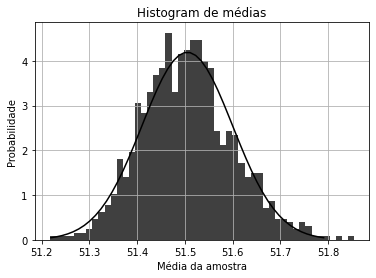

In [51]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras
from scipy.stats import norm
n, bins, patches = plt.hist(medias, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média das médias das amostras {}'.format(mean_))
print('Desvio das médias das amostras {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Média da amostra')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

In [53]:
def calcula_Z_normal(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

def calcula_Z_tstudent(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

calcula_Z_normal(0.99)

2.5758293035489004

Média das variancias 2.7710469576516963
Desvio das variancias 1.0100312903495507


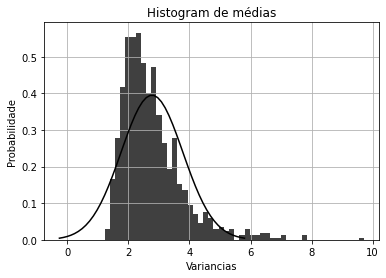

In [54]:
from scipy.stats import norm
n, bins, patches = plt.hist(variancias, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(variancias)
std_ = np.std(variancias)
print('Média das variancias {}'.format(mean_))
print('Desvio das variancias {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Variancias')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

Média das proporções das amostras 0.40097333333333335
Desvio das proporções das amostras 0.028945683999902685


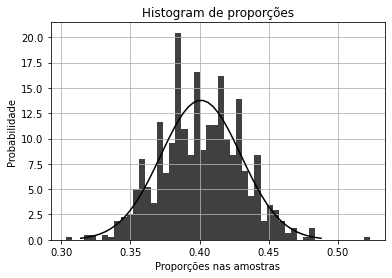

In [55]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras
from scipy.stats import norm
n, bins, patches = plt.hist(percentuais, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(percentuais)
std_ = np.std(percentuais)
print('Média das proporções das amostras {}'.format(mean_))
print('Desvio das proporções das amostras {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Proporções nas amostras')
plt.ylabel('Probabilidade')
plt.title('Histogram de proporções')
plt.grid(True)
plt.show()

Média das qtd_sexo_masculino 120.41
Desvio das qtd_sexo_masculino 8.563755017514222


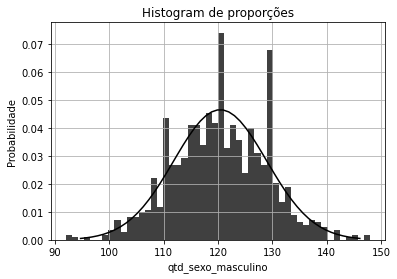

In [56]:
from scipy.stats import norm
n, bins, patches = plt.hist(qtd_sexo_masculino, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(qtd_sexo_masculino)
std_ = np.std(qtd_sexo_masculino)
print('Média das qtd_sexo_masculino {}'.format(mean_))
print('Desvio das qtd_sexo_masculino {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('qtd_sexo_masculino')
plt.ylabel('Probabilidade')
plt.title('Histogram de proporções')
plt.grid(True)
plt.show()